In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [44]:
hdb = pd.read_csv('./archive/hdb_raw.csv')

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [15]:
hdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826581 entries, 0 to 826580
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           826581 non-null  int64  
 1   month                826581 non-null  object 
 2   town                 826581 non-null  object 
 3   flat_type            826581 non-null  object 
 4   block                826581 non-null  object 
 5   street_name          826581 non-null  object 
 6   storey_range         826581 non-null  object 
 7   floor_area_sqm       826581 non-null  float64
 8   flat_model           826581 non-null  object 
 9   lease_commence_date  826581 non-null  int64  
 10  remaining_lease      117527 non-null  object 
 11  resale_price         826581 non-null  float64
dtypes: float64(2), int64(2), object(8)
memory usage: 75.7+ MB


In [16]:
hdb.head()

,Unnamed: 0,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,0,2015-01,ANG MO KIO,3 ROOM,174,ANG MO KIO AVE 4,07 TO 09,60.0,Improved,1986,70,255000.0
1,1,2015-01,ANG MO KIO,3 ROOM,541,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1981,65,275000.0
2,2,2015-01,ANG MO KIO,3 ROOM,163,ANG MO KIO AVE 4,01 TO 03,69.0,New Generation,1980,64,285000.0
3,3,2015-01,ANG MO KIO,3 ROOM,446,ANG MO KIO AVE 10,01 TO 03,68.0,New Generation,1979,63,290000.0
4,4,2015-01,ANG MO KIO,3 ROOM,557,ANG MO KIO AVE 10,07 TO 09,68.0,New Generation,1980,64,290000.0


In [17]:
hdb["town"].value_counts()

TAMPINES           73101
YISHUN             63309
BEDOK              61400
JURONG WEST        60708
WOODLANDS          58735
ANG MO KIO         48237
HOUGANG            45476
BUKIT BATOK        40444
CHOA CHU KANG      33388
BUKIT MERAH        30518
PASIR RIS          30267
TOA PAYOH          28525
QUEENSTOWN         25922
CLEMENTI           25755
GEYLANG            25679
BUKIT PANJANG      24241
KALLANG/WHAMPOA    24030
SENGKANG           23903
JURONG EAST        22864
SERANGOON          21125
BISHAN             19522
PUNGGOL            12336
SEMBAWANG          11016
MARINE PARADE       7388
CENTRAL AREA        6345
BUKIT TIMAH         2283
LIM CHU KANG          64
Name: town, dtype: int64

In [22]:
hdb["flat_type"].value_counts()

4 ROOM              309314
3 ROOM              272580
5 ROOM              170408
EXECUTIVE            62641
2 ROOM                9863
1 ROOM                1273
MULTI GENERATION       279
MULTI-GENERATION       223
Name: flat_type, dtype: int64

In [21]:
hdb.groupby(["town", "flat_type"]).size().sort_values(ascending=False)

town           flat_type
ANG MO KIO     3 ROOM       30757
YISHUN         4 ROOM       30201
TAMPINES       4 ROOM       29850
BEDOK          3 ROOM       28443
WOODLANDS      4 ROOM       26972
                            ...  
HOUGANG        2 ROOM          35
LIM CHU KANG   4 ROOM          18
MARINE PARADE  2 ROOM           8
BUKIT MERAH    EXECUTIVE        5
CENTRAL AREA   EXECUTIVE        2
Length: 136, dtype: int64

In [72]:
def town_boxplot(df):
    index_sort = df.groupby("town").median().sort_values('resale_price').index
    df.town=pd.Categorical(df.town,categories=list(index_sort))
    df.sort_values('town')
    f = plt.figure(figsize=(40, 20))
    sb.boxplot(x='town', y='resale_price', data=df)
    print(df[['town', 'resale_price']].groupby('town').median().sort_values('resale_price'))

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                 resale_price
town                         
LIM CHU KANG          47100.0
YISHUN               231000.0
WOODLANDS            238000.0
BUKIT PANJANG        243000.0
JURONG EAST          243000.0
JURONG WEST          243000.0
BEDOK                246000.0
BUKIT BATOK          250000.0
HOUGANG              260000.0
ANG MO KIO           262000.0
SERANGOON            263500.0
CHOA CHU KANG        270000.0
GEYLANG              270000.0
CLEMENTI             275000.0
TAMPINES             280000.0
PASIR RIS            288000.0
MARINE PARADE        300000.0
SEMBAWANG            318000.0
BUKIT TIMAH          320000.0
KALLANG/WHAMPOA      320000.0
TOA PAYOH            328000.0
BISHAN               338000.0
CENTRAL AREA         350000.0
BUKIT MERAH          371000.0
SENGKANG             383000.0
PUNGGOL              440000.0
QUEENSTOWN           450000.0


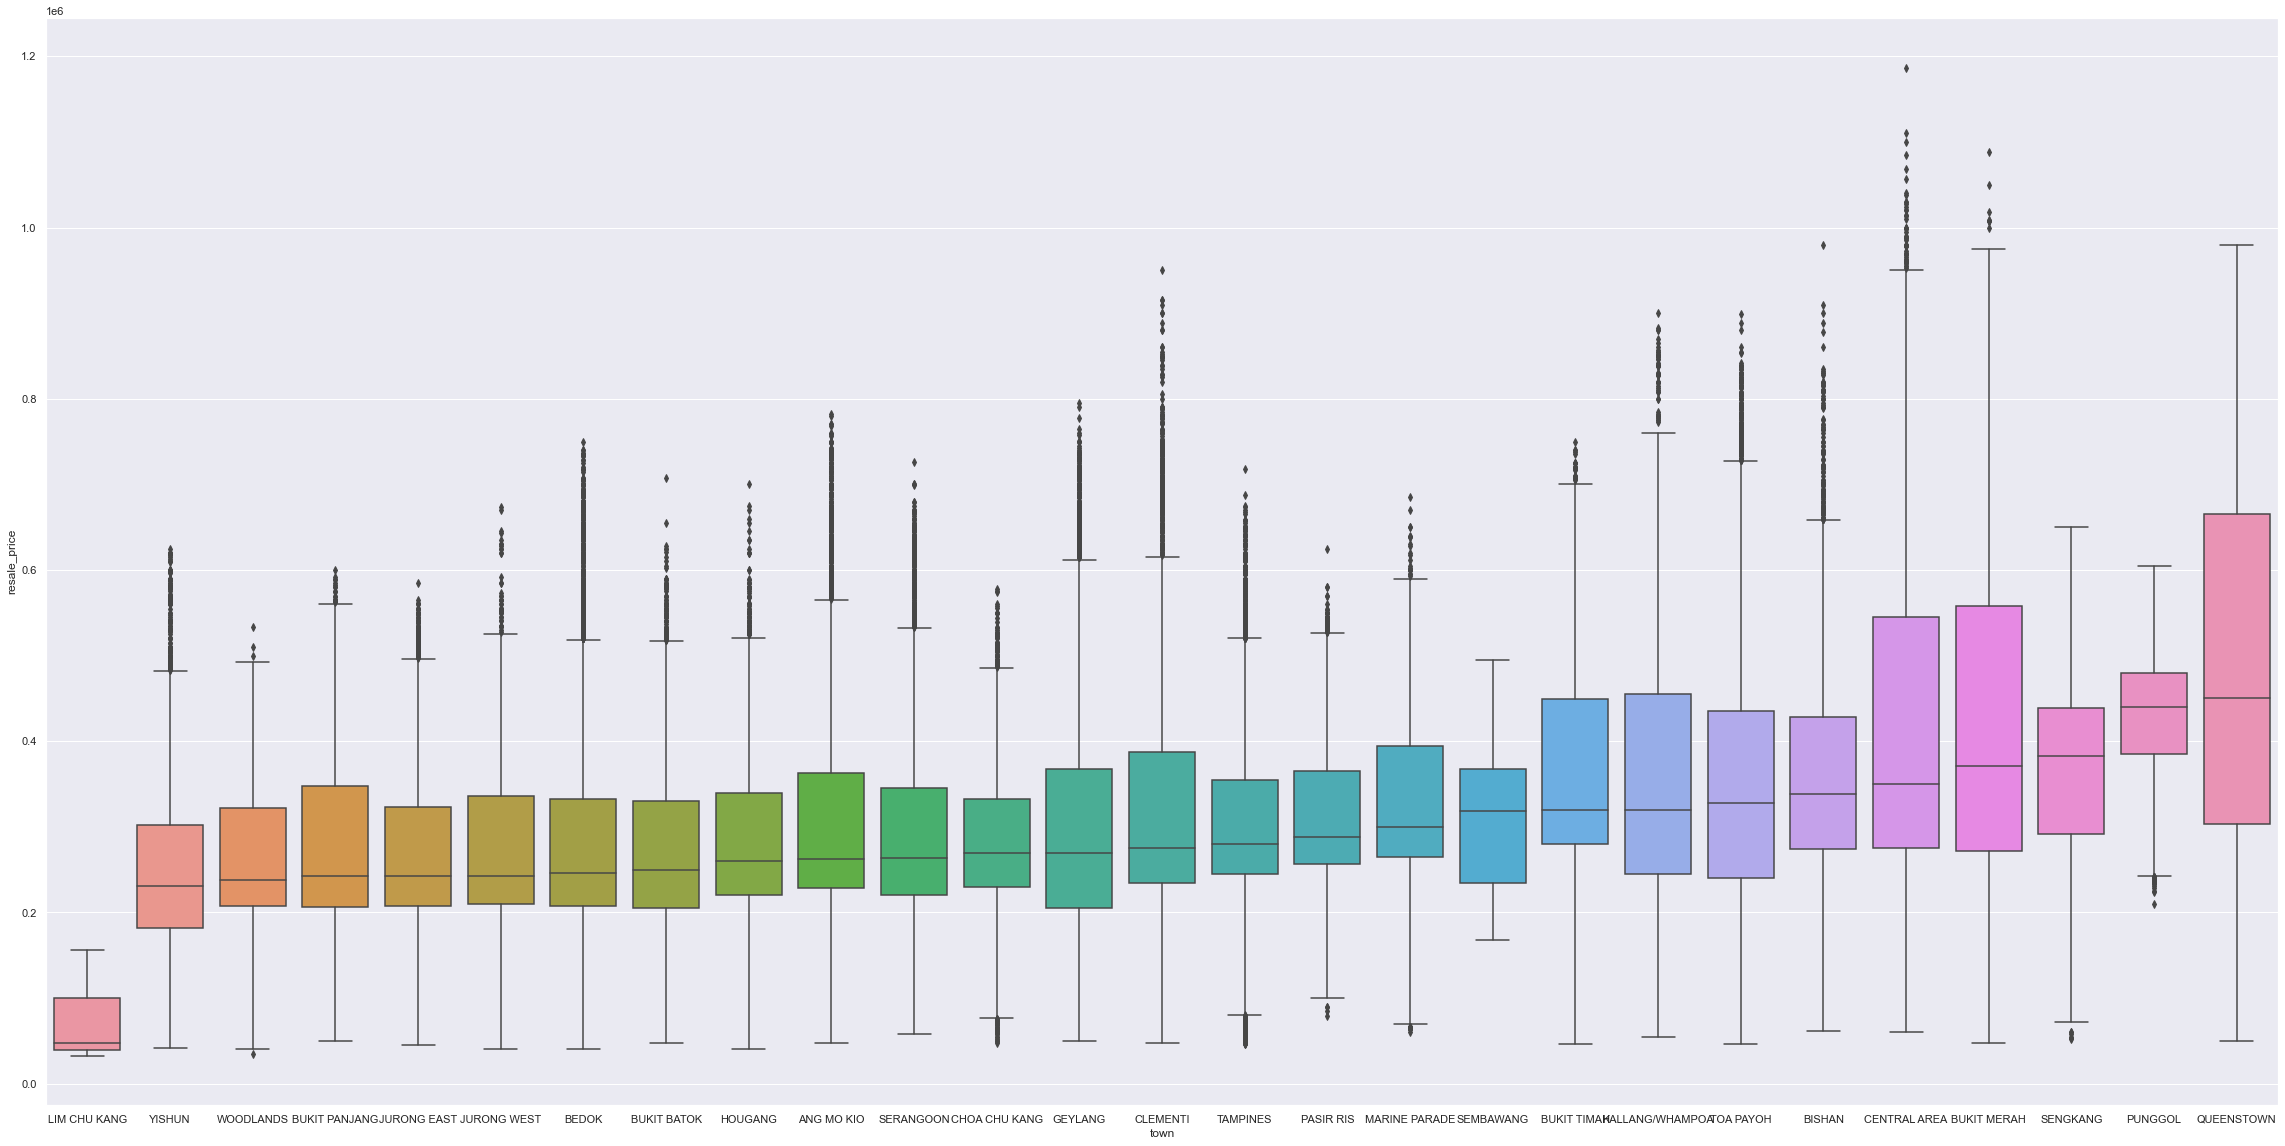

In [73]:
town_boxplot(hdb[hdb['flat_type'] == "4 ROOM"])

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                 resale_price
town                         
LIM CHU KANG          64250.0
JURONG WEST          145000.0
WOODLANDS            151000.0
CHOA CHU KANG        151500.0
BUKIT BATOK          153000.0
BUKIT PANJANG        155000.0
GEYLANG              155500.0
YISHUN               158000.0
JURONG EAST          158000.0
QUEENSTOWN           159000.0
HOUGANG              160000.0
SERANGOON            161500.0
BEDOK                165000.0
ANG MO KIO           168000.0
KALLANG/WHAMPOA      170000.0
CLEMENTI             171000.0
BUKIT MERAH          172000.0
TOA PAYOH            173500.0
TAMPINES             185000.0
BISHAN               185000.0
PASIR RIS            186000.0
BUKIT TIMAH          190000.0
CENTRAL AREA         205000.0
MARINE PARADE        212000.0
SEMBAWANG            290000.0
SENGKANG             340000.0
PUNGGOL              358000.0


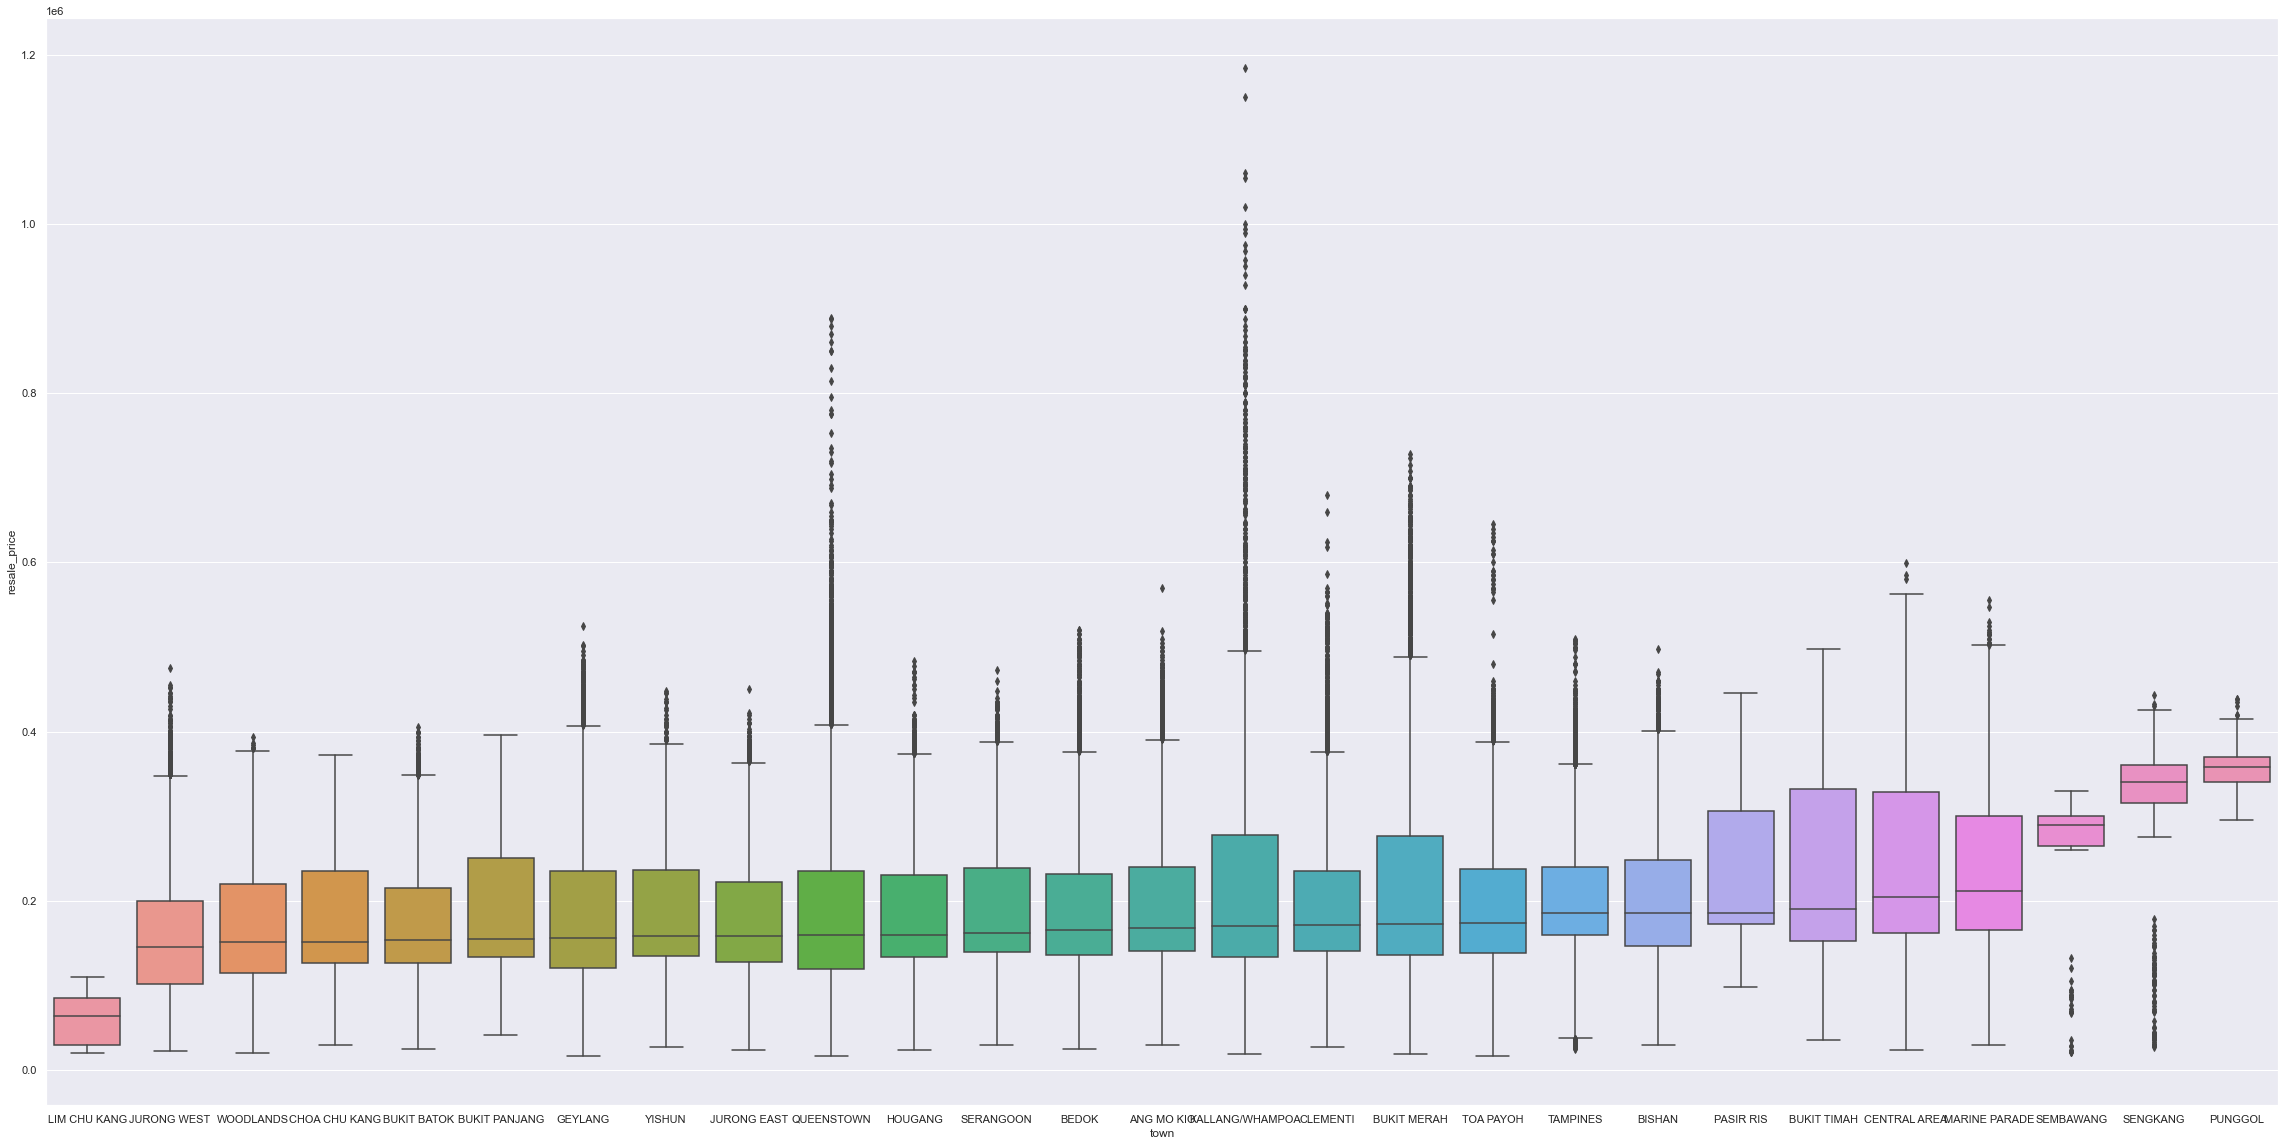

In [74]:
town_boxplot(hdb[hdb['flat_type']=="3 ROOM"])

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                 resale_price
town                         
WOODLANDS            320000.0
YISHUN               333800.0
JURONG EAST          340000.0
JURONG WEST          345000.0
BUKIT PANJANG        350000.0
CHOA CHU KANG        360000.0
HOUGANG              368000.0
PASIR RIS            372000.0
TAMPINES             373000.0
BUKIT BATOK          373000.0
BEDOK                373250.0
SEMBAWANG            375000.0
SERANGOON            380000.0
GEYLANG              400000.0
CLEMENTI             413000.0
ANG MO KIO           416000.0
SENGKANG             420000.0
KALLANG/WHAMPOA      433000.0
PUNGGOL              438000.0
BUKIT TIMAH          443000.0
BISHAN               460500.0
TOA PAYOH            468000.0
MARINE PARADE        480000.0
BUKIT MERAH          500000.0
QUEENSTOWN           526000.0
CENTRAL AREA         800000.0
LIM CHU KANG              NaN


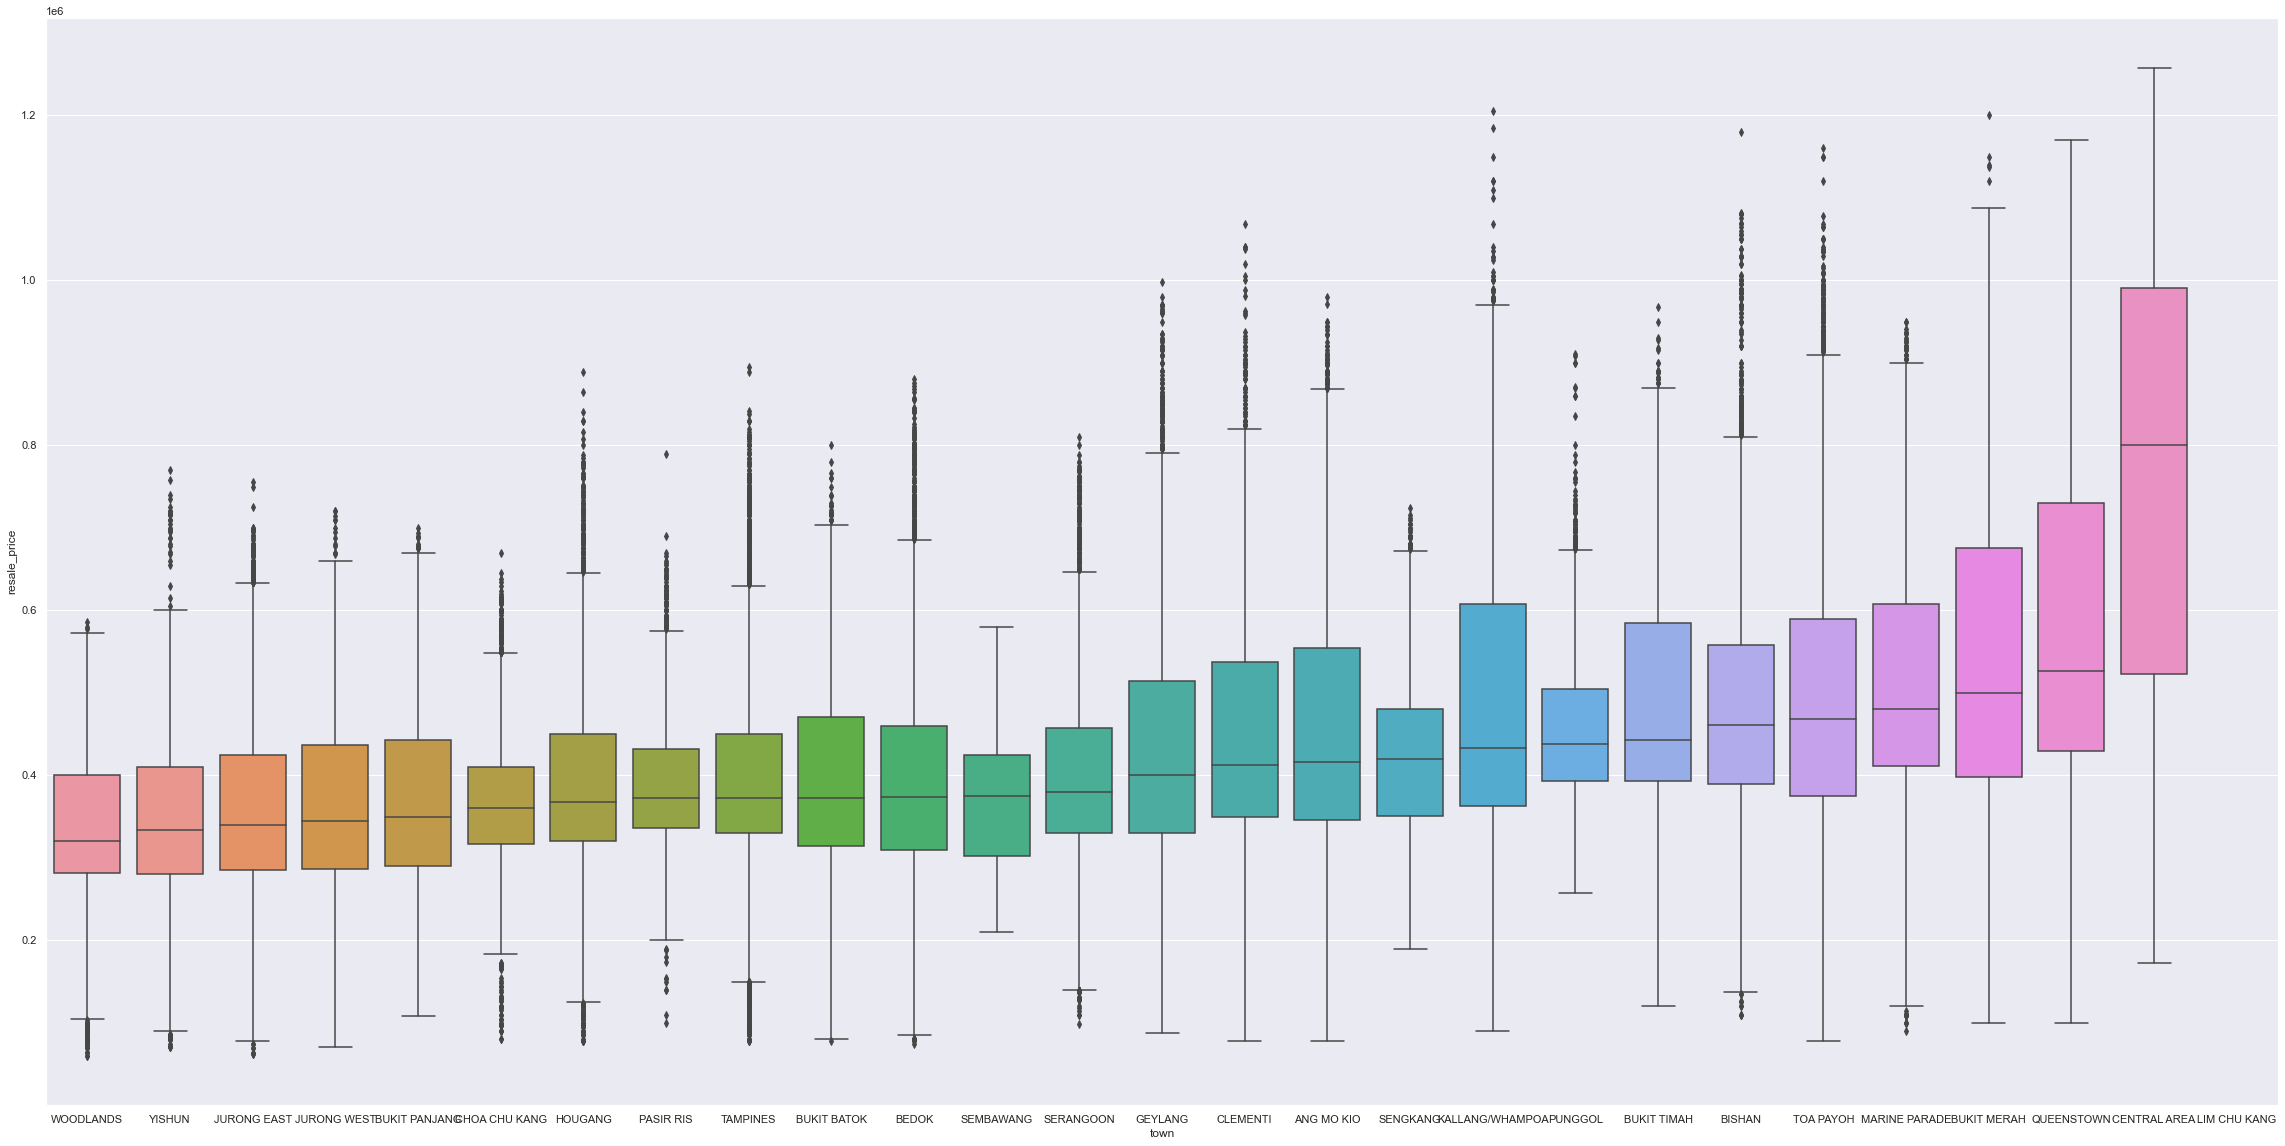

In [75]:
town_boxplot(hdb[hdb['flat_type']=="5 ROOM"])

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                 resale_price
town                         
BUKIT MERAH          398000.0
JURONG WEST          422000.0
YISHUN               425000.0
WOODLANDS            435000.0
BUKIT BATOK          435000.0
JURONG EAST          435000.0
BUKIT PANJANG        443000.0
CHOA CHU KANG        450000.0
SEMBAWANG            468000.0
GEYLANG              470000.0
HOUGANG              476000.0
TAMPINES             482694.0
PASIR RIS            485000.0
BEDOK                490000.0
SERANGOON            490000.0
CENTRAL AREA         499000.0
CLEMENTI             500000.0
KALLANG/WHAMPOA      501000.0
TOA PAYOH            534000.0
SENGKANG             538000.0
PUNGGOL              545000.0
BUKIT TIMAH          555000.0
ANG MO KIO           559000.0
BISHAN               585000.0
QUEENSTOWN           630000.0
LIM CHU KANG              NaN
MARINE PARADE             NaN


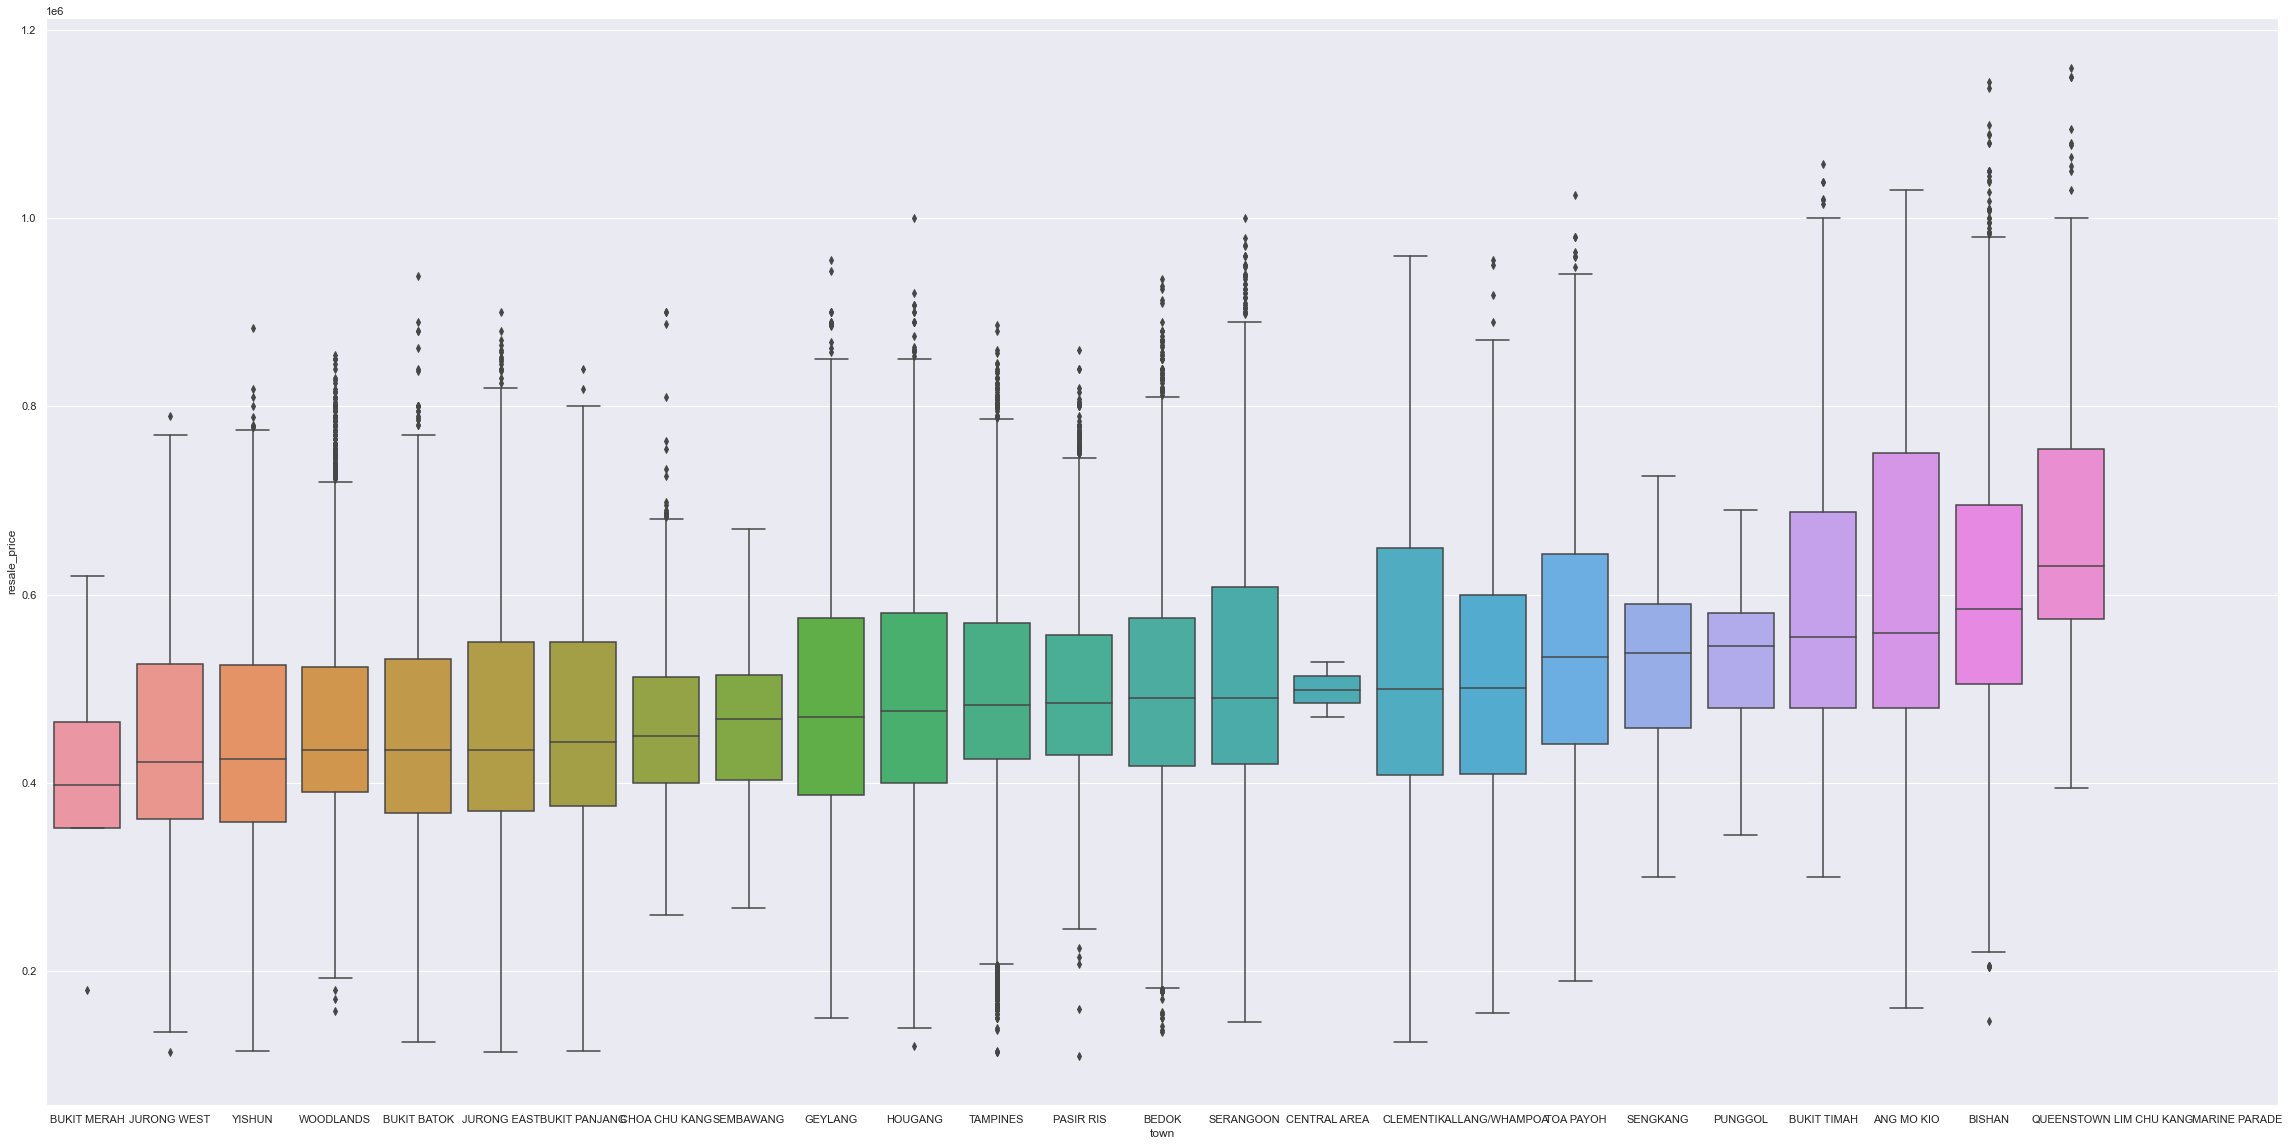

In [76]:
town_boxplot(hdb[hdb['flat_type']=="EXECUTIVE"])

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                 resale_price
town                         
QUEENSTOWN            80000.0
GEYLANG               85000.0
CENTRAL AREA          86000.0
KALLANG/WHAMPOA       99000.0
BUKIT MERAH          104100.0
BEDOK                112000.0
SERANGOON            117500.0
TOA PAYOH            125500.0
ANG MO KIO           128000.0
JURONG WEST          225000.0
YISHUN               225000.0
SEMBAWANG            225000.0
WOODLANDS            225000.0
BUKIT PANJANG        230000.0
CHOA CHU KANG        230000.0
HOUGANG              235000.0
MARINE PARADE        239000.0
JURONG EAST          240000.0
PASIR RIS            247500.0
SENGKANG             253000.0
PUNGGOL              253000.0
CLEMENTI             255500.0
TAMPINES             263000.0
LIM CHU KANG              NaN
BUKIT BATOK               NaN
BISHAN                    NaN
BUKIT TIMAH               NaN


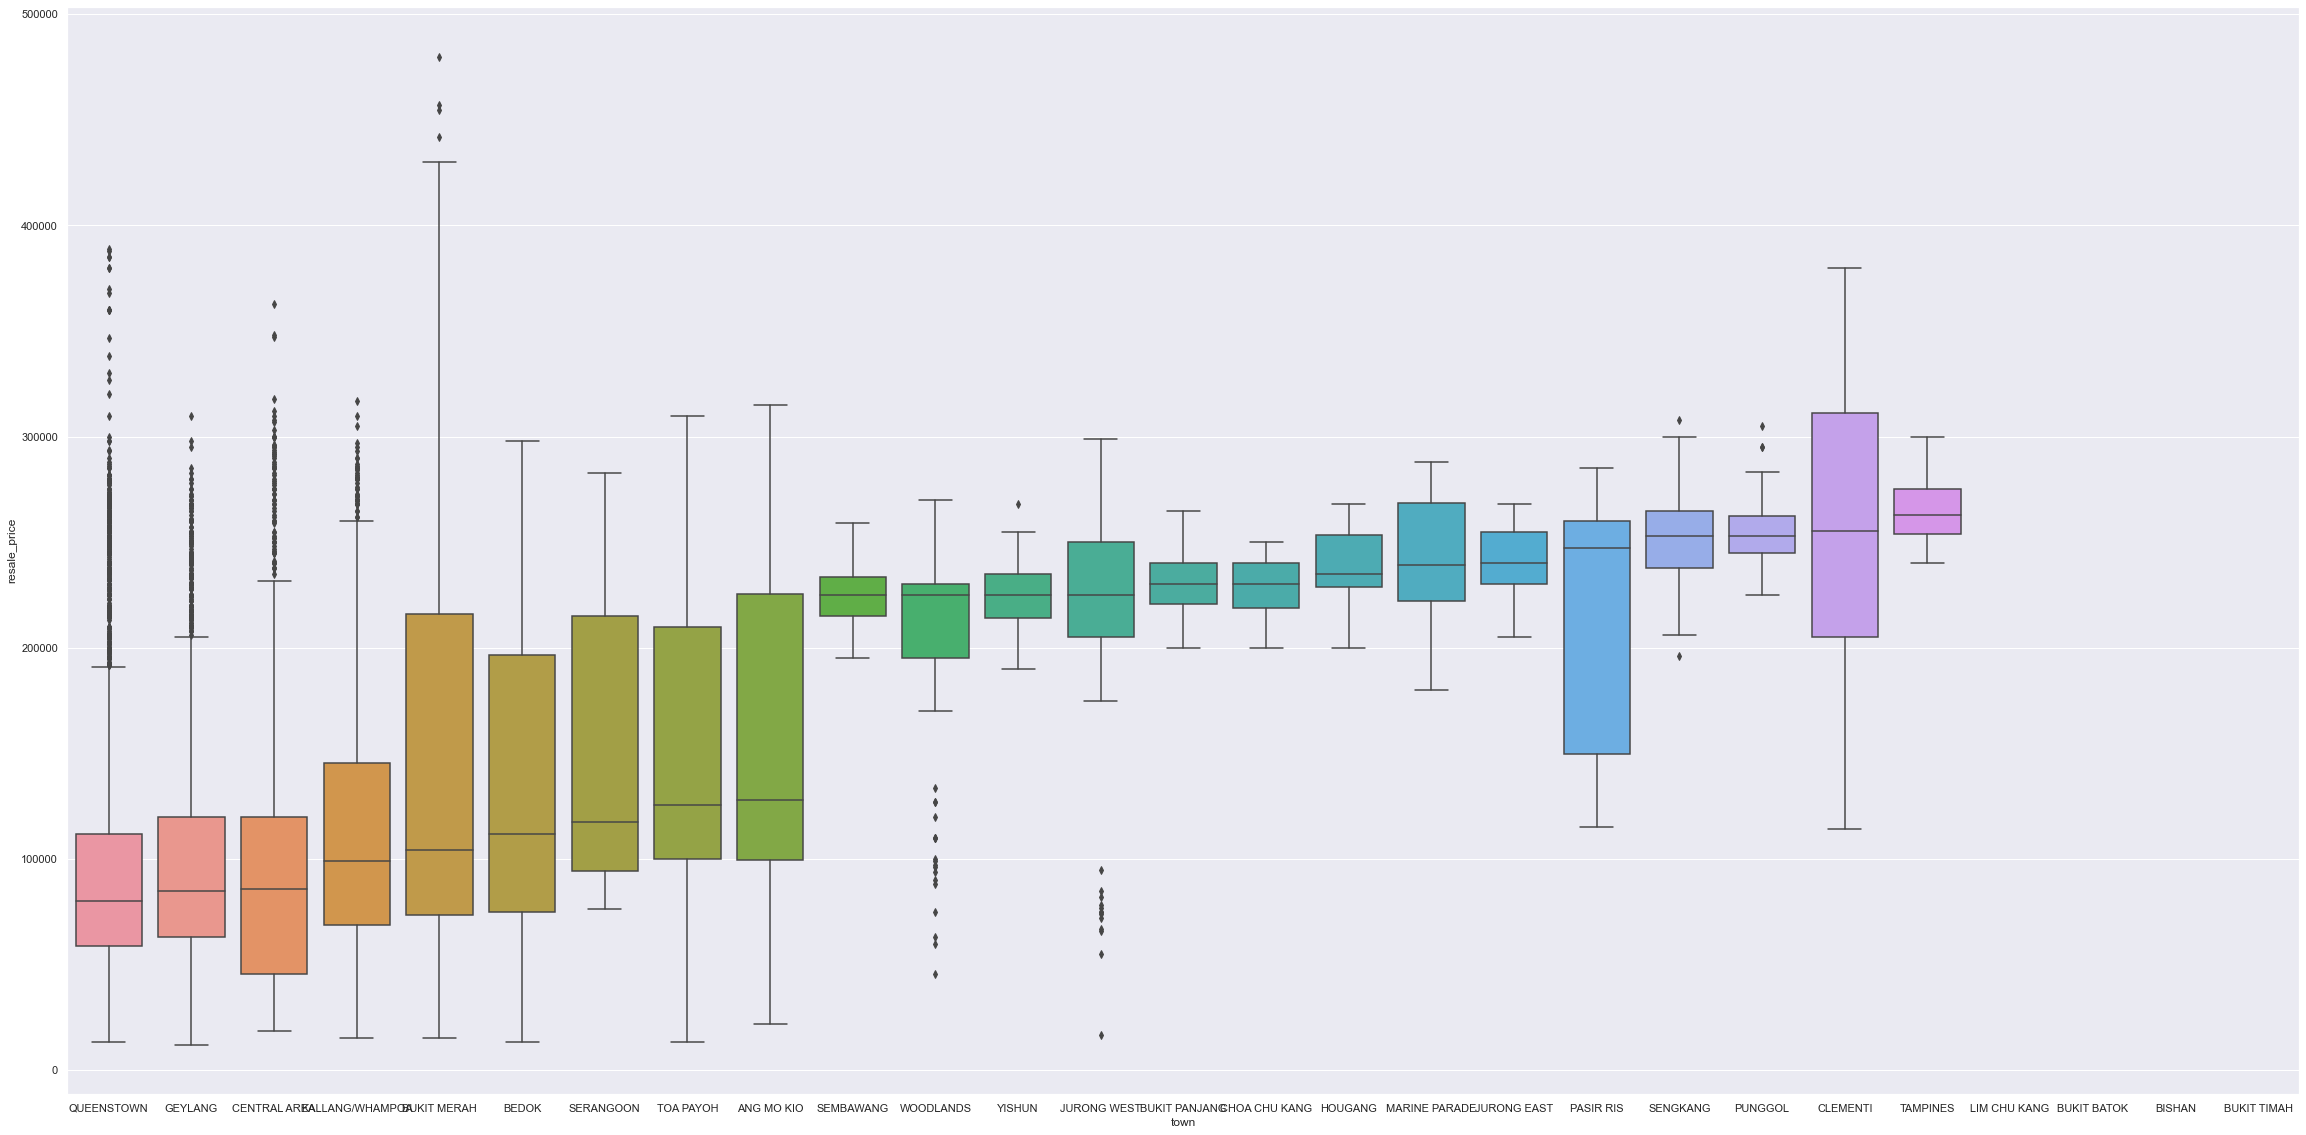

In [77]:
town_boxplot(hdb[hdb['flat_type']=="2 ROOM"])

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                 resale_price
town                         
BUKIT MERAH           46000.0
ANG MO KIO            50000.0
LIM CHU KANG              NaN
QUEENSTOWN                NaN
GEYLANG                   NaN
CLEMENTI                  NaN
BEDOK                     NaN
TOA PAYOH                 NaN
CENTRAL AREA              NaN
YISHUN                    NaN
BUKIT BATOK               NaN
JURONG EAST               NaN
KALLANG/WHAMPOA           NaN
JURONG WEST               NaN
HOUGANG                   NaN
WOODLANDS                 NaN
SERANGOON                 NaN
MARINE PARADE             NaN
BUKIT PANJANG             NaN
TAMPINES                  NaN
CHOA CHU KANG             NaN
SEMBAWANG                 NaN
PASIR RIS                 NaN
BISHAN                    NaN
BUKIT TIMAH               NaN
SENGKANG                  NaN
PUNGGOL                   NaN


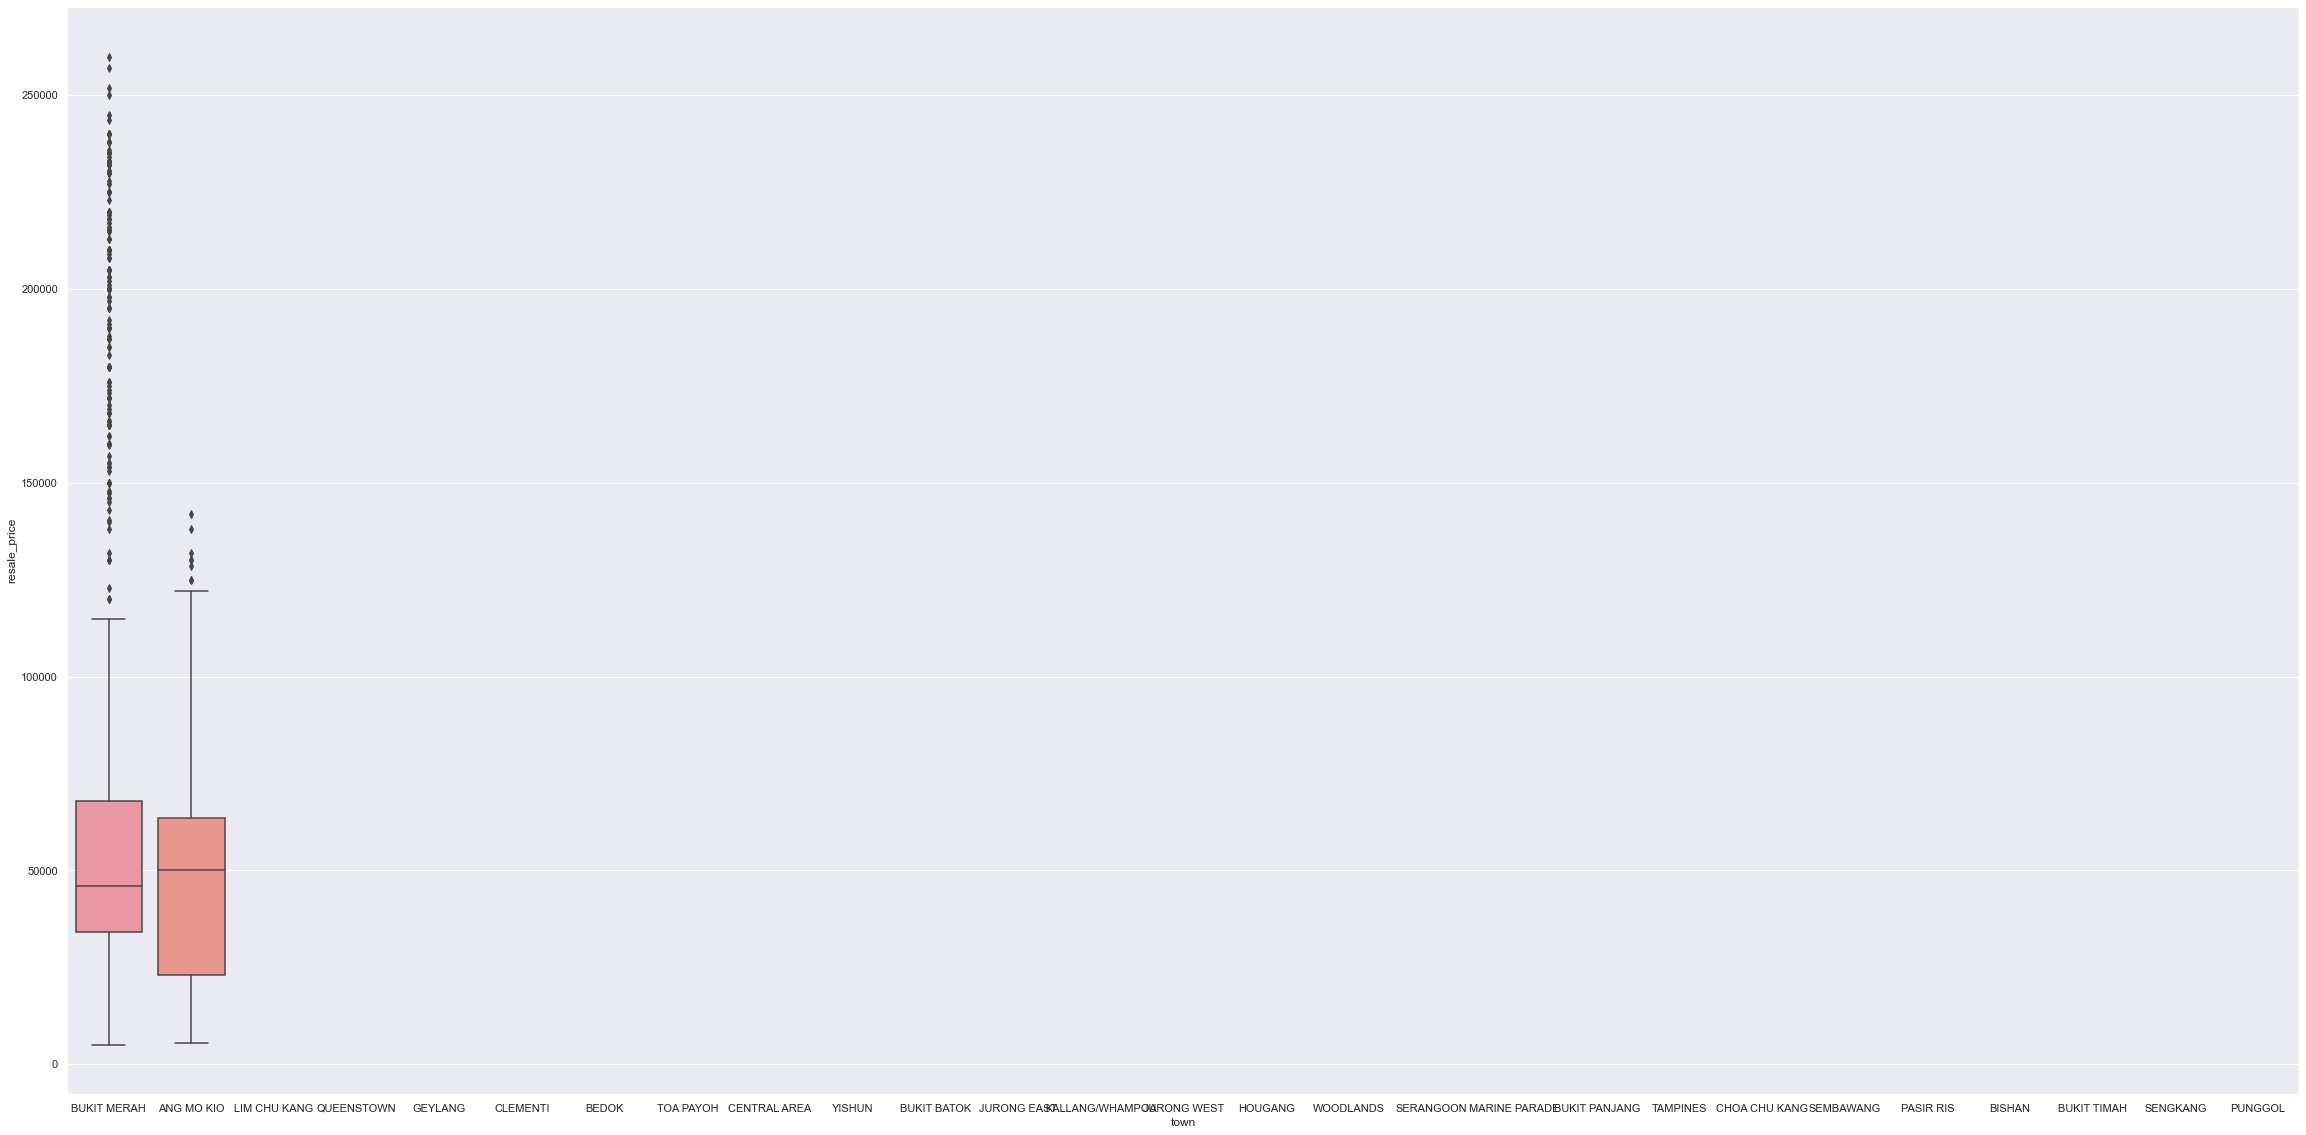

In [78]:
town_boxplot(hdb[hdb['flat_type']=="1 ROOM"])

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                 resale_price
town                         
YISHUN               455000.0
TAMPINES             477000.0
BISHAN               545000.0
LIM CHU KANG              NaN
QUEENSTOWN                NaN
ANG MO KIO                NaN
GEYLANG                   NaN
CLEMENTI                  NaN
BEDOK                     NaN
TOA PAYOH                 NaN
CENTRAL AREA              NaN
BUKIT BATOK               NaN
JURONG EAST               NaN
KALLANG/WHAMPOA           NaN
JURONG WEST               NaN
BUKIT MERAH               NaN
HOUGANG                   NaN
WOODLANDS                 NaN
SERANGOON                 NaN
MARINE PARADE             NaN
BUKIT PANJANG             NaN
CHOA CHU KANG             NaN
SEMBAWANG                 NaN
PASIR RIS                 NaN
BUKIT TIMAH               NaN
SENGKANG                  NaN
PUNGGOL                   NaN


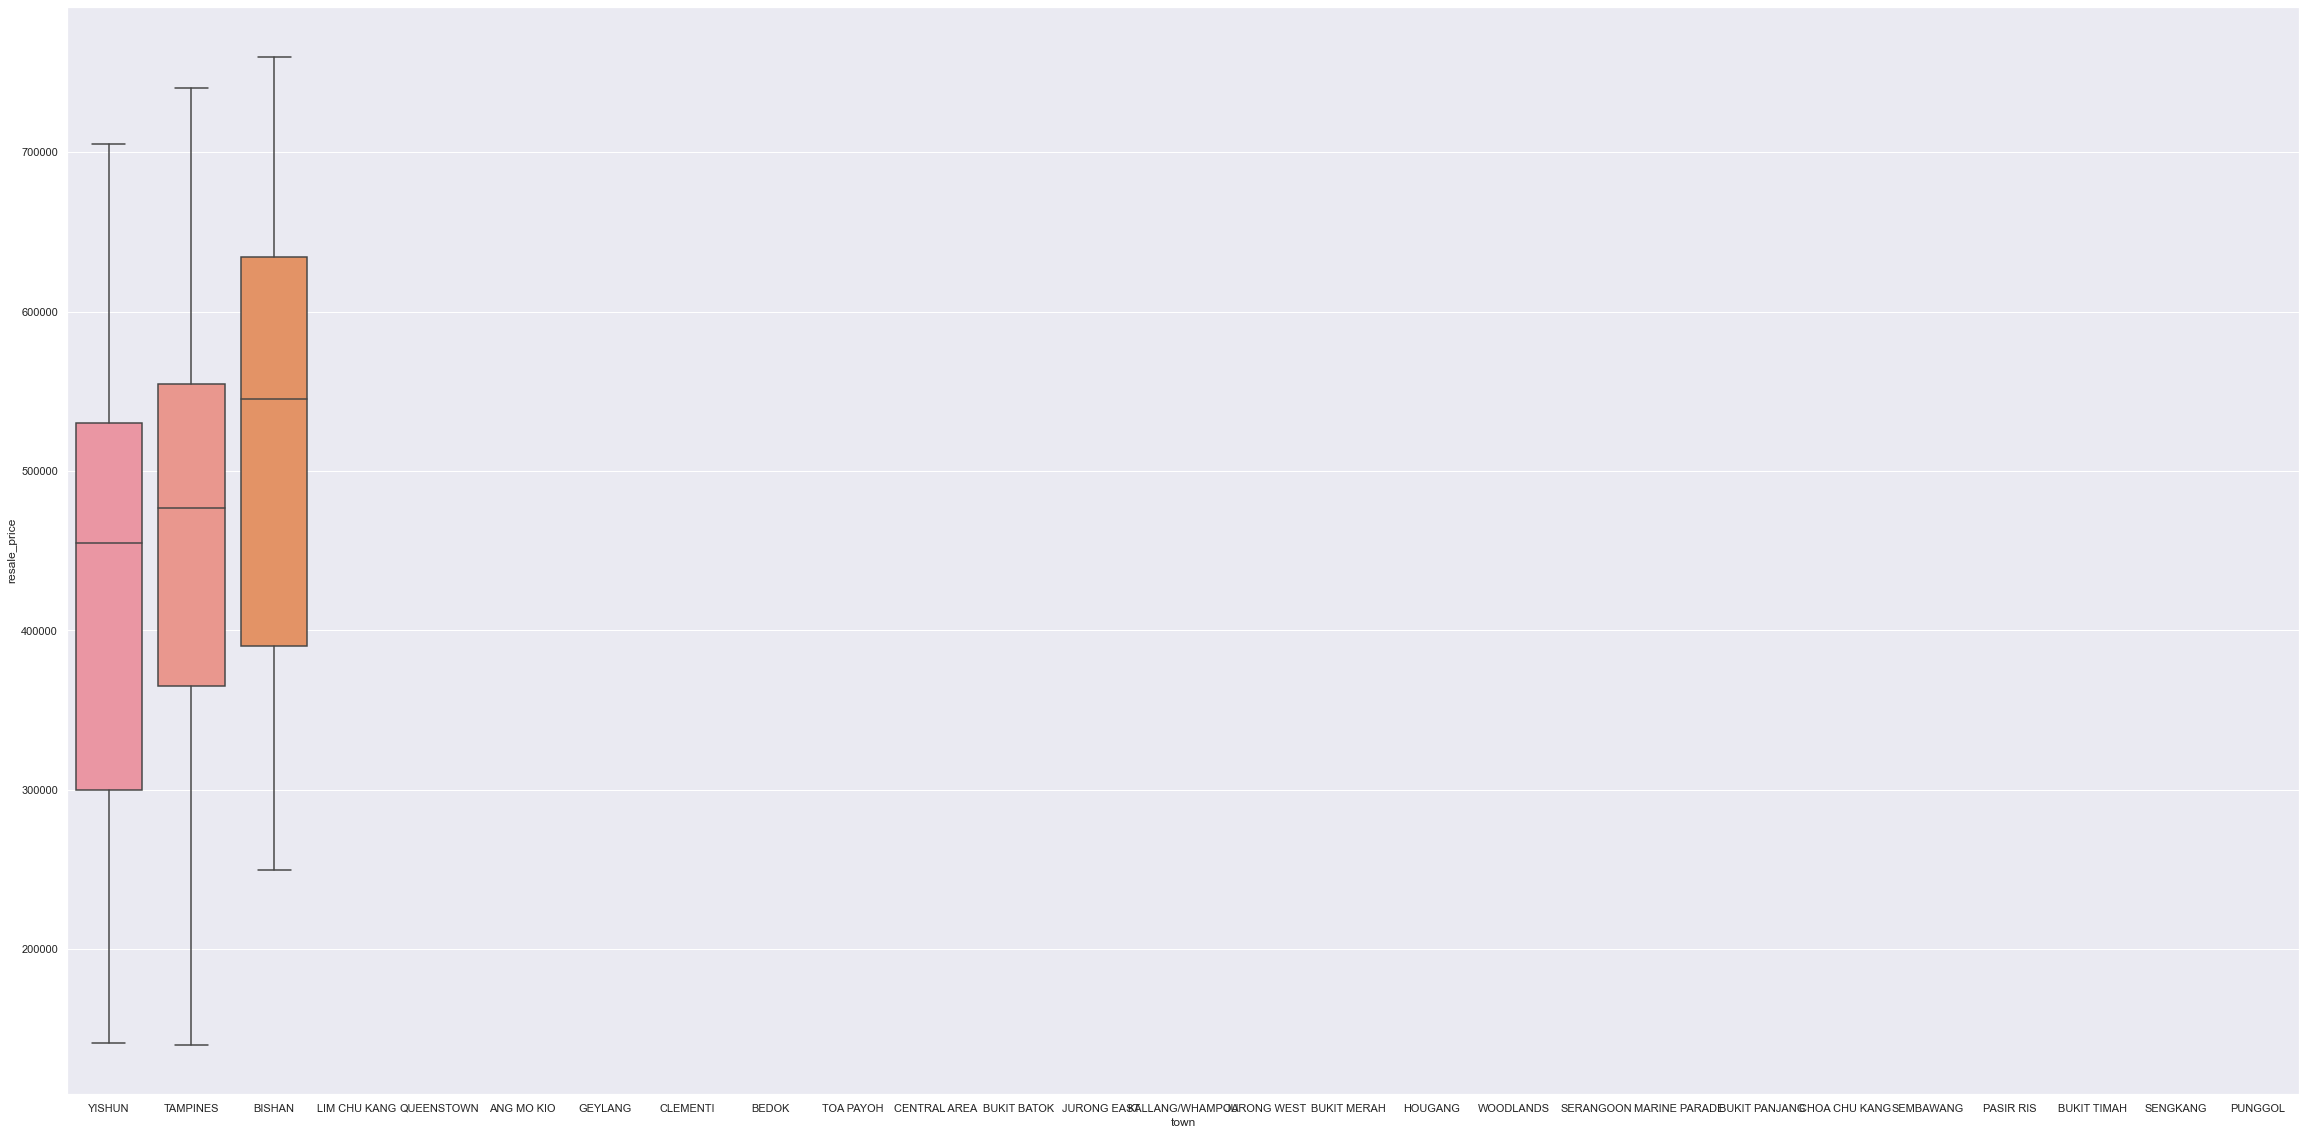

In [103]:
town_boxplot(hdb[hdb['flat_type']=="MULTI GENERATION"])

/Users/bryan/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


                 resale_price
town                         
YISHUN               470000.0
TAMPINES             505000.0
BISHAN               620000.0
LIM CHU KANG              NaN
QUEENSTOWN                NaN
ANG MO KIO                NaN
GEYLANG                   NaN
CLEMENTI                  NaN
BEDOK                     NaN
TOA PAYOH                 NaN
CENTRAL AREA              NaN
BUKIT BATOK               NaN
JURONG EAST               NaN
KALLANG/WHAMPOA           NaN
JURONG WEST               NaN
BUKIT MERAH               NaN
HOUGANG                   NaN
WOODLANDS                 NaN
SERANGOON                 NaN
MARINE PARADE             NaN
BUKIT PANJANG             NaN
CHOA CHU KANG             NaN
SEMBAWANG                 NaN
PASIR RIS                 NaN
BUKIT TIMAH               NaN
SENGKANG                  NaN
PUNGGOL                   NaN


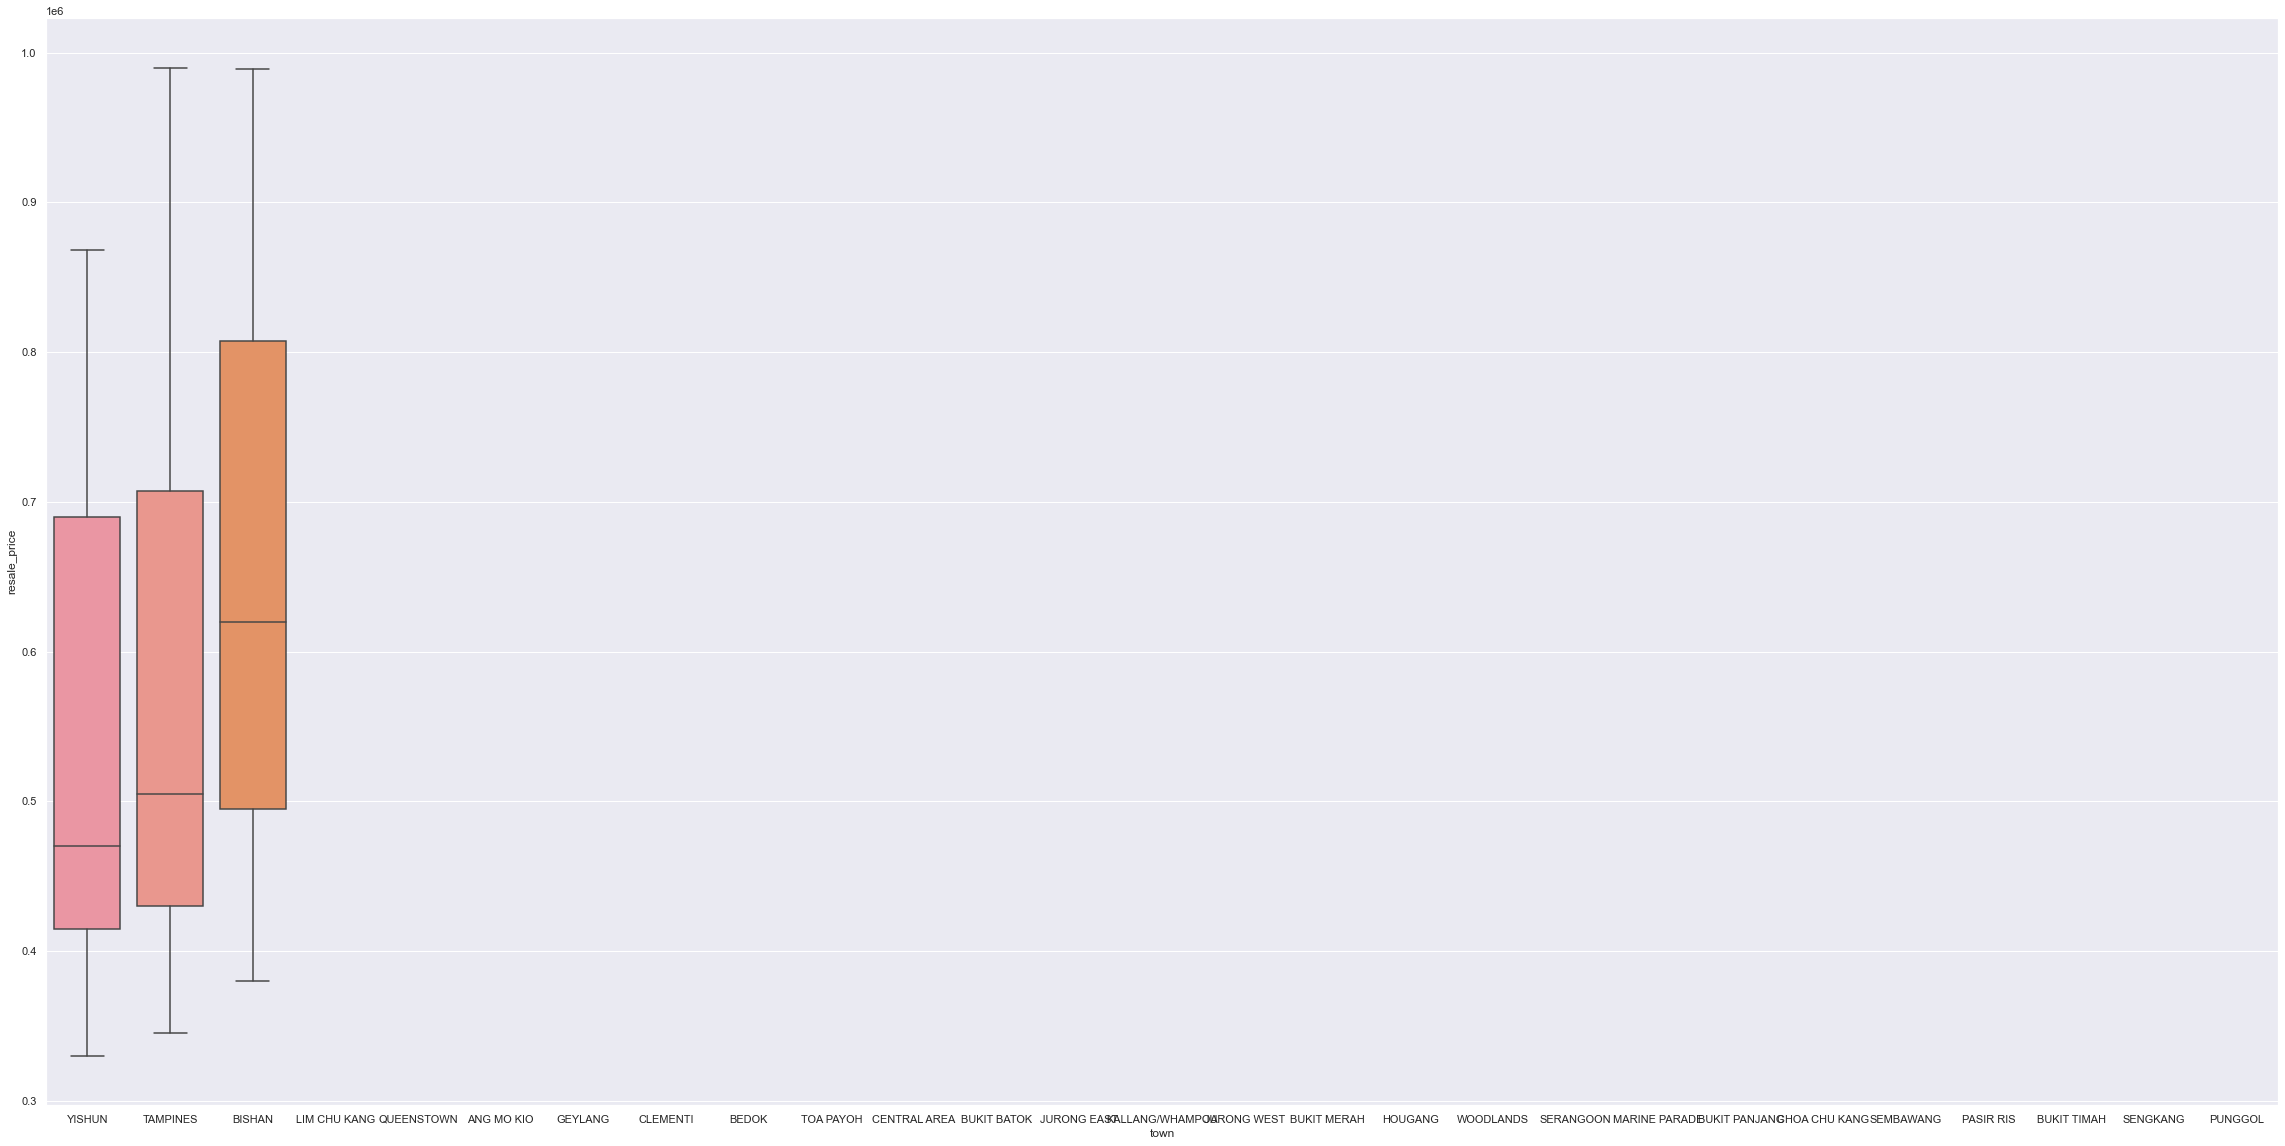

In [104]:
town_boxplot(hdb[hdb['flat_type']=="MULTI-GENERATION"])

In [49]:
hdb["flat_type"].value_counts()

4 ROOM              309314
3 ROOM              272580
5 ROOM              170408
EXECUTIVE            62641
2 ROOM                9863
1 ROOM                1273
MULTI GENERATION       279
MULTI-GENERATION       223
Name: flat_type, dtype: int64

In [12]:
town_block = hdb.groupby(["town", "block", "flat_type", "street_name", "floor_area_sqm", "lease_commence_date"]).size().sort_values(ascending=False)

In [82]:
town_block

town             block  flat_type  street_name        floor_area_sqm  lease_commence_date
JURONG WEST      211    3 ROOM     BOON LAY PL        65.0            1976                   667
                 186    3 ROOM     BOON LAY AVE       59.0            1975                   618
                 185    3 ROOM     BOON LAY AVE       59.0            1975                   615
                 208    3 ROOM     BOON LAY PL        65.0            1976                   613
                 210    3 ROOM     BOON LAY PL        65.0            1977                   612
                                                                                            ... 
                 327    4 ROOM     TAH CHING RD       107.0           1997                     1
                 326    5 ROOM     TAH CHING RD       119.0           1997                     1
                 321    5 ROOM     TAH CHING RD       119.0           1997                     1
                 272A   5 ROOM     JU

In [73]:
town_block = hdb.groupby(["town", "block", "flat_type", "street_name", "floor_area_sqm"]).size().sort_values(ascending=False)

In [74]:
town_block

town             block  flat_type  street_name        floor_area_sqm
JURONG WEST      211    3 ROOM     BOON LAY PL        65.0              667
                 186    3 ROOM     BOON LAY AVE       59.0              618
                 185    3 ROOM     BOON LAY AVE       59.0              615
                 208    3 ROOM     BOON LAY PL        65.0              613
                 210    3 ROOM     BOON LAY PL        65.0              612
                                                                       ... 
                 327    4 ROOM     TAH CHING RD       107.0               1
                 326    5 ROOM     TAH CHING RD       119.0               1
                 321    5 ROOM     TAH CHING RD       119.0               1
                 272A   5 ROOM     JURONG WEST ST 24  115.0               1
KALLANG/WHAMPOA  1      3 ROOM     BEACH RD           62.0                1
Length: 36380, dtype: int64

In [87]:
hdb["town"].value_counts()

TAMPINES           73101
YISHUN             63309
BEDOK              61400
JURONG WEST        60708
WOODLANDS          58735
ANG MO KIO         48237
HOUGANG            45476
BUKIT BATOK        40444
CHOA CHU KANG      33388
BUKIT MERAH        30518
PASIR RIS          30267
TOA PAYOH          28525
QUEENSTOWN         25922
CLEMENTI           25755
GEYLANG            25679
BUKIT PANJANG      24241
KALLANG/WHAMPOA    24030
SENGKANG           23903
JURONG EAST        22864
SERANGOON          21125
BISHAN             19522
PUNGGOL            12336
SEMBAWANG          11016
MARINE PARADE       7388
CENTRAL AREA        6345
BUKIT TIMAH         2283
LIM CHU KANG          64
Name: town, dtype: int64

In [104]:
town = hdb[hdb["town"]=="TAMPINES"]

In [114]:
town[['town', 'resale_price']]

,town,resale_price
972,TAMPINES,300000.0
973,TAMPINES,305000.0
974,TAMPINES,308000.0
975,TAMPINES,312000.0
976,TAMPINES,315000.0
...,...,...
826360,TAMPINES,752000.0
826361,TAMPINES,680000.0
826362,TAMPINES,677500.0
826363,TAMPINES,580000.0


In [117]:
town.describe()

,resale_price
count,73101.000000
mean,314767.171861
std,133046.192023
min,25000.000000
25%,220000.000000
50%,300000.000000
75%,395000.000000
max,990000.000000


<AxesSubplot:xlabel='town', ylabel='resale_price'>

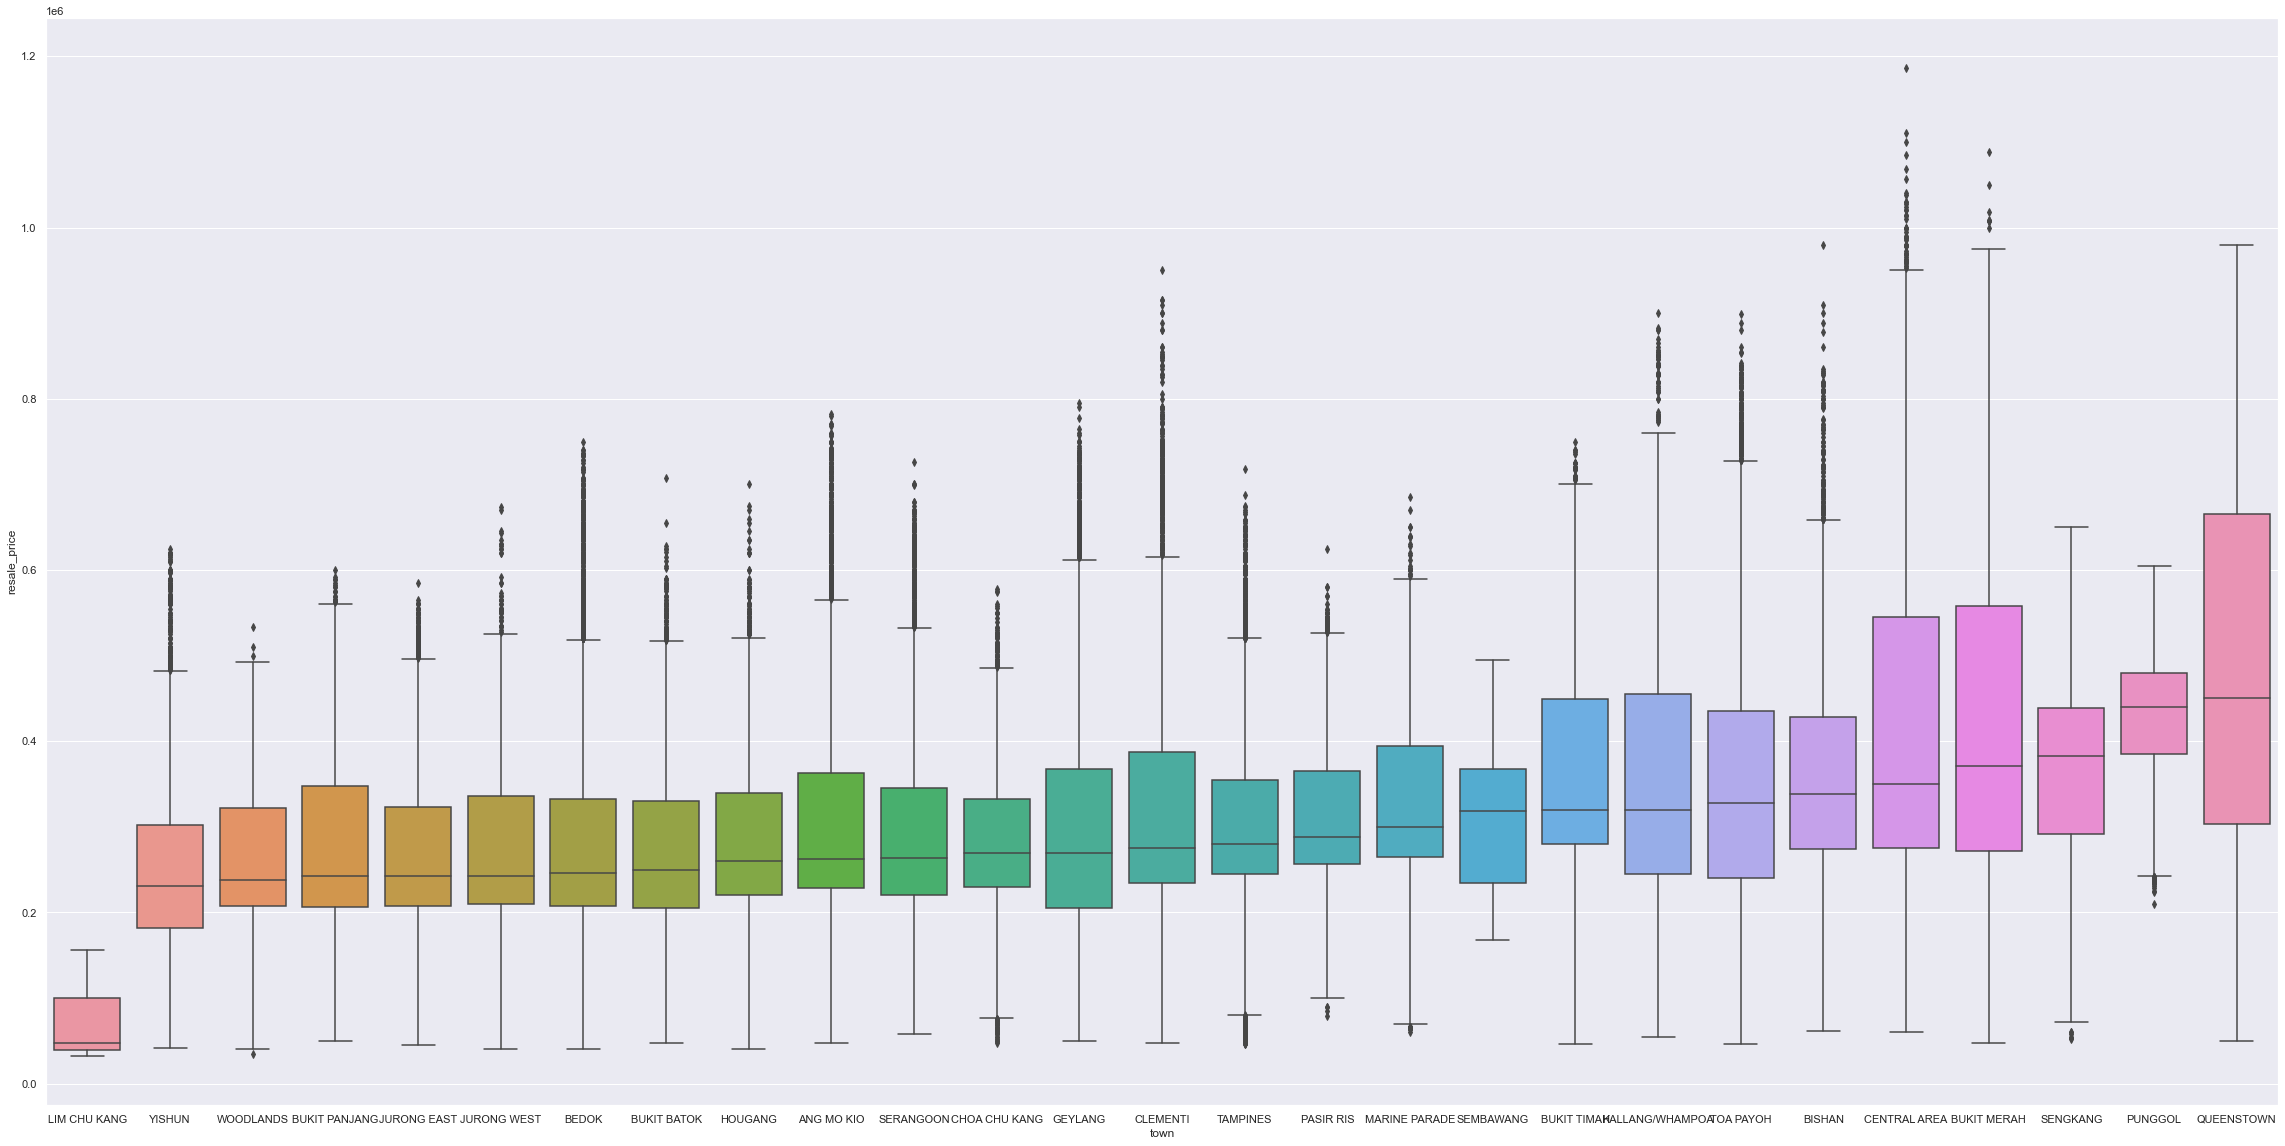

In [230]:
f = plt.figure(figsize=(40, 20))
sb.boxplot(x='town', y='resale_price', data=hdb[hdb['flat_type']=='4 ROOM'])

In [242]:
pd.set_option('display.max_rows', 10)
hdb.month.value_counts()

1999-03    6468
1999-06    5862
1998-10    5709
1999-04    5698
1999-05    5671
           ... 
1991-02     816
1990-10     810
1990-05     778
2020-04     424
2020-05     363
Name: month, Length: 369, dtype: int64